    
# Linear Model on North Carolina Crime Rate Dataset (Part II)

## **Objective:**

To use insights from EDA to develop a suitable **linear model with crmrte as the dependent variable** and explain the various aspects of the model.

## Actionable Observations from EDA

1) The **density and urban variable** has highest correlation with crime rate.

2) But, density and urban variable **seems to be highly correlated**, which is obvious, because urban areas are densely populated. Hence, there is a **high chance of multicollinearity** between density and urban features. We wll use linear regression to sort out this question.

3) The feature, 'urban' has a correlation of 0.62 with crime rate, but whether the correlation is because 'urban' has very high correlation with 'density' is yet to be known.

4) A combination of density and location (west/ central/ urban) can help aid crime rate prediction. 

5) Wage columns, wfed & wtrd are positively correlated to 'density' feature. This can be intuitively understood as the **weekly wages would be higher in urban areas.**

6) Some of the **"wage features" are positively correlated**, as the wage increase/ decrease in one domain would certainly influence the other.

7) wtrd & wfir are positively correlated to wfed & wloc. Also, wfir and wtrd have moderate correlation with each other.

8) There are **6 strongly correlated values** with Crime Rate: crmrte, density, urban, wfed, taxpc, wtrd.



# Load Input Data

In [61]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load crime_v2.csv into a pandas dataFrame.
crimeData = pd.read_csv("crime_v2.csv")
    
# (Q) how many data-points and features?
print (crimeData.shape)

# See the input data.
crimeData.head(5)
# Identified the columns have header information.


(91, 25)


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
0,1,87,0.035604,0.298270,0.527596,0.436170,6.71,0.001828,2.422633,30.993681,...,408.724487,221.270065,453.172211,274.177460,334.540008,477.579987,292.089996,311.910004,0.080169,0.077871
1,3,87,0.015253,0.132029,1.481480,0.450000,6.35,0.000746,1.046332,26.892078,...,376.254181,196.010101,258.564972,192.307693,300.380005,409.829987,362.959992,301.470001,0.030227,0.082607
2,5,87,0.012960,0.444444,0.267857,0.600000,6.76,0.001234,0.412766,34.816051,...,372.208435,229.320892,305.944061,209.697220,237.649994,358.980011,331.529999,281.369995,0.465116,0.072115
3,7,87,0.026753,0.364760,0.525424,0.435484,7.14,0.001530,0.491557,42.947586,...,397.690125,191.172012,281.065094,256.721435,281.799988,412.149994,328.269989,299.029999,0.273622,0.073537
4,9,87,0.010623,0.518219,0.476563,0.442623,8.22,0.000860,0.546948,28.054739,...,377.312561,206.821487,289.312469,215.193329,290.890015,377.350006,367.230011,342.820007,0.060086,0.070698


# Data Cleaning

In [62]:
# Data Cleaning based on EDA 
# Last row with special character fixed in input data.

# Removing the wage outlier row based on observation from EDA
crimeData = crimeData[crimeData.county != 185] # very high wser & prob of conviction
crimeData = crimeData[crimeData.county != 115] # prob of arrest > 1

# Removing rows with probability of arrest and conviction > 1
crimeData = crimeData[crimeData['prbarr'] < 1]
crimeData = crimeData[crimeData['prbconv'] < 1]

# The location cannot be both west and central together.
crimeData = crimeData[crimeData['west']+crimeData['central'] <= 1]

# dropping the Year column as it doesnt help in prediction
crimeData = crimeData.drop('year', axis=1)

# (Q) how many after deletion?
print (crimeData.shape)

(80, 24)


# Evaluate Observations using Linear Regression Model

Lets evaluate the above observations by building Linear Regression Models, as it helps to understand the relation between variables better.

## Creating Model with Most Correlated Feature

In [63]:
import statsmodels.api as sm

y = crimeData['crmrte']
# X = crimeData.drop('crmrte', axis=1)
X = crimeData['density']

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # make the predictions by the model

density_pvalue = model.pvalues['density']

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     85.18
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           3.88e-14
Time:                        13:47:00   Log-Likelihood:                 234.23
No. Observations:                  80   AIC:                            -464.5
Df Residuals:                      78   BIC:                            -459.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0222      0.002     10.949      0.000       0.018       0.026
density        0.0088      0.001      9.229      0.000       0.007       0.011
==============================================================================
Omnibus:                       31.606   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.597
Skew:                           1.517   Prob(JB):                     3.11e-13
Kurtosis:                       5.841   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interim Observations:**

a) As the p-value of density is 0 (small), the changes in crime rate has got close relation with changes in density.

b) R-squared value is found to be 0.525 with only density as predictor variable. This means that 52.5% variability of crime rate is explained by density feature.

c) Co-effient estimate of 0.0086 indicates one value increase of density would cause 0.0086 value increase in crime rate.

## Creating Model with Top 2 Correlated Features

In [64]:
y = crimeData['crmrte']
# X = crimeData.drop('crmrte', axis=1)
# X = crimeData[('density', 'urban')]
X = crimeData[['density', 'urban']]

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

density_pvalue_upd = model.pvalues['density']
print('Difference in P-Value = ' + str(density_pvalue_upd - density_pvalue))

# Print out the statistics
model.summary()


Difference in P-Value = 2.2791391426354033e-05


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     42.12
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           4.38e-13
Time:                        13:47:00   Log-Likelihood:                 234.27
No. Observations:                  80   AIC:                            -462.5
Df Residuals:                      77   BIC:                            -455.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0226      0.002      9.170      0.000       0.018       0.027
density        0.0084      0.002      4.511      0.000       0.005       0.012
urban          0.0026      0.010      0.277      0.783      -0.016       0.022
==============================================================================
Omnibus:                       31.413   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.769
Skew:                           1.514   Prob(JB):                     4.71e-13
Kurtosis:                       5.804   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interim Observations:**

a) **R-squared value is found to be slightly higher (0.527)** when the variable, 'urban' is coupled with density as predictor variables. But, R Squared always goes up when you add more variables regardless of whether the added variable help in prediction or not.

b)  Adjusted R Squared, penalizes for adding more variables. Thus, it can go down when you add variables that don’t contribute. Here note that, **Adjusted R-squared value has gone down from 0.519 to 0.514. Also, the AIC value is increased from -470 to -469** (the smaller the AIC value, the better the model is).

c) It has been noticed that the **p-value of 'density' feature has been increased slightly.** 

Thus, **the model has become more less reliable to explain crime rate**, because the feature 'urban' doesnt contribute to prediction. The confusion about the correlation between 'urban' and 'density' variable during EDA step, has been sorted out.

**Note:** If we add variables that are not meaningful as predictor, then it **would cause 'Overfitting'.** Then, prediction model would perform great with the training data but not with the real world data.

# Multiple Linear Regression

## Model with all Features

In [65]:
y = crimeData['crmrte']
X = crimeData.drop('crmrte', axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()
# density_pvalue = model.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     20.94
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           9.21e-20
Time:                        13:47:00   Log-Likelihood:                 295.18
No. Observations:                  80   AIC:                            -542.4
Df Residuals:                      56   BIC:                            -485.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.018      0.660      0.512      -0.024       0.048
county      2.584e-06   1.54e-05      0.168      0.867   -2.82e-05    3.33e-05
prbarr        -0.0522      0.010     -5.093      0.000      -0.073      -0.032
prbconv       -0.0073      0.006     -1.179      0.243      -0.020       0.005
prbpris        0.0110      0.012      0.890      0.377      -0.014       0.036
avgsen        -0.0008      0.000     -2.005      0.050      -0.002   -6.38e-07
polpc         10.7921      2.617      4.123      0.000       5.549      16.036
density        0.0049      0.001      3.523      0.001       0.002       0.008
taxpc          0.0002      0.000      1.918      0.060   -8.89e-06       0.000
west          -0.0051      0.004     -1.205      0.233      -0.014       0.003
central       -0.0063      0.003     -2.320      0.024      -0.012      -0.001
urban          0.0035      0.006      0.558      0.579      -0.009       0.016
pctmin80       0.0003   9.37e-05      2.877      0.006    8.19e-05       0.000
wcon        3.108e-05   2.67e-05      1.164      0.249   -2.24e-05    8.46e-05
wtuc        1.281e-05   1.52e-05      0.842      0.403   -1.77e-05    4.33e-05
wtrd        5.237e-05    4.2e-05      1.248      0.217   -3.17e-05       0.000
wfir       -4.966e-05    2.8e-05     -1.774      0.081      -0.000    6.41e-06
wser       -8.336e-05   3.05e-05     -2.729      0.008      -0.000   -2.22e-05
wmfg       -2.522e-06   1.35e-05     -0.186      0.853   -2.96e-05    2.46e-05
wfed        3.817e-05    2.5e-05      1.527      0.132   -1.19e-05    8.82e-05
wsta       -5.022e-05   2.42e-05     -2.074      0.043   -9.87e-05   -1.71e-06
wloc        4.453e-05   4.51e-05      0.987      0.328   -4.58e-05       0.000
mix           -0.0228      0.014     -1.632      0.108      -0.051       0.005
pctymle        0.1447      0.044      3.261      0.002       0.056       0.234
==============================================================================
Omnibus:                        6.753   Durbin-Watson:                   2.494
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.098
Skew:                           0.639   Prob(JB):                       0.0474
Kurtosis:                       3.443   Cond. No.                     3.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
y = crimeData['crmrte']

# Feature 'urban' is found to be worsen the model as per above analysis.
# Intuitively county shouldnt contribute prediction and also p value is high.
X = crimeData.drop(['crmrte', 'urban', 'county'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     23.60
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           4.53e-21
Time:                        13:47:01   Log-Likelihood:                 294.95
No. Observations:                  80   AIC:                            -545.9
Df Residuals:                      58   BIC:                            -493.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.017      0.568      0.572      -0.025       0.045
prbarr        -0.0524      0.010     -5.197      0.000      -0.073      -0.032
prbconv       -0.0076      0.006     -1.240      0.220      -0.020       0.005
prbpris        0.0104      0.012      0.862      0.392      -0.014       0.035
avgsen        -0.0008      0.000     -2.011      0.049      -0.002   -3.73e-06
polpc         10.6581      2.557      4.168      0.000       5.540      15.776
density        0.0055      0.001      6.517      0.000       0.004       0.007
taxpc          0.0002      0.000      2.012      0.049     1.1e-06       0.000
west          -0.0045      0.004     -1.108      0.272      -0.013       0.004
central       -0.0062      0.003     -2.343      0.023      -0.012      -0.001
pctmin80       0.0003   8.82e-05      3.231      0.002       0.000       0.000
wcon         3.12e-05   2.63e-05      1.186      0.240   -2.15e-05    8.39e-05
wtuc        1.339e-05   1.45e-05      0.924      0.359   -1.56e-05    4.24e-05
wtrd        5.361e-05    4.1e-05      1.308      0.196   -2.84e-05       0.000
wfir       -5.175e-05   2.73e-05     -1.899      0.063      -0.000    2.81e-06
wser       -8.318e-05   2.96e-05     -2.809      0.007      -0.000   -2.39e-05
wmfg       -1.573e-06   1.32e-05     -0.119      0.906    -2.8e-05    2.49e-05
wfed        3.676e-05   2.45e-05      1.500      0.139   -1.23e-05    8.58e-05
wsta       -4.646e-05   2.28e-05     -2.034      0.047   -9.22e-05   -7.44e-07
wloc        4.501e-05   4.44e-05      1.014      0.315   -4.39e-05       0.000
mix           -0.0223      0.014     -1.628      0.109      -0.050       0.005
pctymle        0.1439      0.043      3.330      0.002       0.057       0.230
==============================================================================
Omnibus:                        6.849   Durbin-Watson:                   2.503
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.210
Skew:                           0.646   Prob(JB):                       0.0448
Kurtosis:                       3.438   Cond. No.                     3.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Removing features from all-feature Model

**Interim Observations:**

a) **Adj. R-squared improved** from 0.825 in all-feature model to 0.830, after removal of 2 features 'urban', 'county'.

b) **AIC value decreased** from -591.3 in all-feature model to -595.2, after removal of 2 features 'urban', 'county'.

Thus, **we have a better model than the all-feature model.** We will try to remove more features and analyze the model indicators.

In [67]:
y = crimeData['crmrte']
# Features are dropped based on p-value, R-Squared and AIC figures.
X = crimeData.drop(['crmrte', 'urban', 'county', 
                    'wmfg', 'prbpris', 'wloc', 'west', 'wtuc'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     30.98
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           8.65e-24
Time:                        13:47:01   Log-Likelihood:                 292.00
No. Observations:                  80   AIC:                            -550.0
Df Residuals:                      63   BIC:                            -509.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0213      0.015      1.444      0.154      -0.008       0.051
prbarr        -0.0567      0.010     -5.893      0.000      -0.076      -0.037
prbconv       -0.0090      0.006     -1.501      0.138      -0.021       0.003
avgsen        -0.0007      0.000     -1.912      0.060      -0.001    3.15e-05
polpc          9.7105      2.378      4.083      0.000       4.958      14.463
density        0.0055      0.001      6.629      0.000       0.004       0.007
taxpc          0.0002   9.28e-05      2.657      0.010    6.11e-05       0.000
central       -0.0039      0.002     -2.058      0.044      -0.008      -0.000
pctmin80       0.0004   5.56e-05      6.573      0.000       0.000       0.000
wcon        4.224e-05   2.36e-05      1.786      0.079   -5.01e-06    8.95e-05
wtrd        6.553e-05   3.84e-05      1.705      0.093   -1.13e-05       0.000
wfir       -5.353e-05   2.64e-05     -2.028      0.047      -0.000   -7.86e-07
wser       -7.792e-05   2.82e-05     -2.768      0.007      -0.000   -2.17e-05
wfed        4.205e-05   2.35e-05      1.789      0.078   -4.91e-06     8.9e-05
wsta       -4.664e-05   2.18e-05     -2.136      0.037   -9.03e-05   -3.01e-06
mix           -0.0224      0.013     -1.697      0.095      -0.049       0.004
pctymle        0.1471      0.041      3.583      0.001       0.065       0.229
==============================================================================
Omnibus:                        3.198   Durbin-Watson:                   2.571
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.731
Skew:                           0.450   Prob(JB):                        0.255
Kurtosis:                       3.089   Cond. No.                     2.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interim Observations:**

a) **Adj. R-squared of the above model with 8 features dropped is better** than the all-feature model.

b) **AIC value of the above model is better** than the all-feature model.

**Thus, we have a better model than the all-feature model** by removing more features such as 'wmfg', 'prbpris', 'wloc', 'west', 'wtuc'. We will try to remove even more features with p > 0.05 and evaluate using RMSE. 

# Model Evaluation Using Cross Validation & RMSE

We will test the change in RMSE value when the features with p > 0.05 are removed. The features with p > 0.05 are prbconv, mix, wfed, wtrd, wcon & avgsen. We will also check the RMSE values for the features removed in the previous model.

In [68]:
from sklearn.cross_validation import train_test_split

def calculateRMSE(X, y, feature='None'):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    # Instantiate and fit the model
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)

    RMSE = str(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    # RMSE
    print("RMSE with " + feature + " removed = " + RMSE)
    return RMSE

RMSE with None removed = 0.010075406096366427
RMSE with wmfg removed = 0.01006007187974235
RMSE with prbpris removed = 0.01014745401843015
RMSE with wloc removed = 0.010071614796901635
RMSE with west removed = 0.010318153302695499
RMSE with wtuc removed = 0.010120409553697383
RMSE with prbconv removed = 0.010164979560164386
RMSE with mix removed = 0.010329179206231479
RMSE with wfed removed = 0.0105140913061571
RMSE with wtrd removed = 0.010129324432420156
RMSE with wcon removed = 0.009752796976395408
RMSE with avgsen removed = 0.010447795436723613


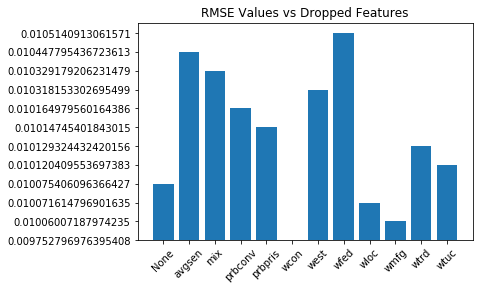

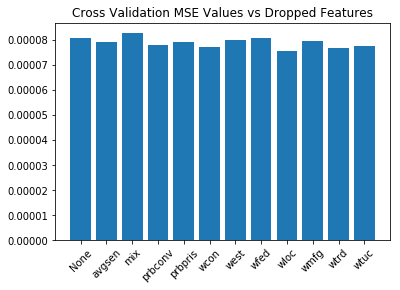

In [69]:
from sklearn.cross_validation import cross_val_score

rmseVals = []
cv_scores = []
droppedFeatures = []

# Features are dropped based on p-value, R-Squared and AIC figures.
features2Drop = ['crmrte', 'urban', 'county']

y = crimeData['crmrte']
X = crimeData.drop(features2Drop, axis=1)

rmseVals.append(calculateRMSE(X, y))
droppedFeatures.append('None')
scores = cross_val_score(LinearRegression(), 
                         X, y, cv=10, scoring='neg_mean_squared_error')
cv_scores.append(-1*scores.mean())

# 'wmfg', 'prbpris', 'wloc', 'west', 'wtuc' are dropped in the previous model
features2Test = ['wmfg', 'prbpris', 'wloc', 'west', 'wtuc', 
                 'prbconv', 'mix', 'wfed', 'wtrd', 'wcon', 'avgsen']

for feature in features2Test:
    features2Drop.append(feature)
    X = crimeData.drop(features2Drop, axis=1)
    features2Drop.remove(feature)
    rmseVals.append(calculateRMSE(X, y, feature))
    droppedFeatures.append(feature)

    scores = cross_val_score(LinearRegression(), 
                             X, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(-1*scores.mean())
        
# print(droppedFeatures)
# print(cv_scores)

plt.bar(droppedFeatures, rmseVals)
plt.title('RMSE Values vs Dropped Features')
plt.xticks(rotation=45)
plt.show()

plt.bar(droppedFeatures, cv_scores)
plt.title('Cross Validation MSE Values vs Dropped Features')
plt.xticks(rotation=45)
plt.show()


From the bar chart, the RMSE values performs better than 'None' when wtuc, wtrd, wloc, west, wmfg and avgsen are removed. Thus, in addition to the previous model, **wtrd & avgsen features are removed.** But the R-squared and AIC figures degrade when both the features are removed. Since wtrd has a higher p value, **we will remove wtrd in our model.**

The lowest cross validation MSE is for wloc, wtrd, prbconv and wcon. Thus, in addition to the previous exclusions, prbconv & wcon also can be dropped. But removal of either feature would increase the RMSE value as per the above plot. Thus, we will remove only wtrd in our model.

# OLS Regression Characteristic of Final Model

In [70]:
y = crimeData['crmrte']
# Features are dropped based on p-value, R-Squared and AIC figures.
X = crimeData.drop(['crmrte', 'urban', 'county', 
                    'wmfg', 'prbpris', 'wloc', 
                    'west', 'wtuc', 'wtrd'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     31.90
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           5.95e-24
Time:                        13:47:02   Log-Likelihood:                 290.20
No. Observations:                  80   AIC:                            -548.4
Df Residuals:                      64   BIC:                            -510.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0273      0.015      1.875      0.065      -0.002       0.056
prbarr        -0.0565      0.010     -5.786      0.000      -0.076      -0.037
prbconv       -0.0113      0.006     -1.909      0.061      -0.023       0.001
avgsen        -0.0007      0.000     -1.773      0.081      -0.001     8.3e-05
polpc          8.7668      2.347      3.735      0.000       4.078      13.455
density        0.0057      0.001      6.946      0.000       0.004       0.007
taxpc          0.0003   9.39e-05      2.735      0.008    6.93e-05       0.000
central       -0.0037      0.002     -1.896      0.062      -0.008       0.000
pctmin80       0.0004   5.63e-05      6.381      0.000       0.000       0.000
wcon        4.943e-05   2.36e-05      2.094      0.040    2.27e-06    9.66e-05
wfir       -3.692e-05   2.49e-05     -1.483      0.143   -8.67e-05    1.28e-05
wser       -7.727e-05   2.86e-05     -2.705      0.009      -0.000   -2.02e-05
wfed        5.208e-05   2.31e-05      2.256      0.028    5.96e-06    9.82e-05
wsta       -5.317e-05   2.18e-05     -2.438      0.018   -9.67e-05    -9.6e-06
mix           -0.0207      0.013     -1.550      0.126      -0.047       0.006
pctymle        0.1404      0.041      3.386      0.001       0.058       0.223
==============================================================================
Omnibus:                        7.285   Durbin-Watson:                   2.498
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.695
Skew:                           0.608   Prob(JB):                       0.0352
Kurtosis:                       3.727   Cond. No.                     2.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Testing the Model on Input Data

In [71]:
# To calculate Linear Regression, do plotting and calculate error

# Importing the statistics module
from statistics import mean
from statistics import median

# used to format headings 
bold = '\033[1m'
end = '\033[0m'

def linearReg(x_train, y_train, x_test, y_test):
    
    lm = LinearRegression()
    lm.fit(x_train, y_train)

    y_pred = lm.predict(x_test)

    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Crime Rate: $Y_i$")
    plt.ylabel("Predicted Crime Rate: $\hat{Y}_i$")
    plt.title("Actual Crime Rate vs Predicted Crime Rate: $Y_i$ vs $\hat{Y}_i$")
    plt.show()
    
    # calculate MAE, MSE, RMSE
    print("Mean Absolute Error (MAE) = " + str(
                metrics.mean_absolute_error(y_test, y_pred)))
    print("Median Squared Error (MSE) = " + str(
                metrics.mean_squared_error(y_test, y_pred)))
    print("Root Mean Squared Error (RMSE) = " + str(
                np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    
    print("Explained Variance = " + str(
                    metrics.explained_variance_score(y_test, y_pred)))

    # Calculating the error
    delta_y = y_test - y_pred;
    print("Median Absolute Error = " + str(median(abs(delta_y))))

Train Data Shape:
(56, 14) (56,)
Test Data Shape:
(24, 14) (24,)


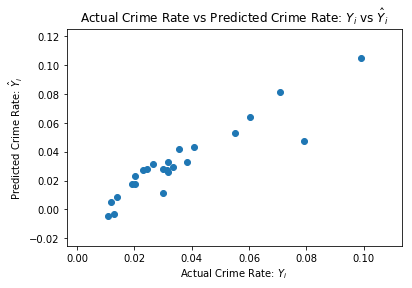

Mean Absolute Error (MAE) = 0.006986915112800922
Median Squared Error (MSE) = 9.631084350128324e-05
Root Mean Squared Error (RMSE) = 0.009813808817237233
Explained Variance = 0.8203755208633289
Median Absolute Error = 0.004534970460507454


In [79]:
from sklearn.cross_validation import train_test_split

y = crimeData['crmrte']
X = crimeData.drop(['crmrte', 'urban', 'county', 
                    'wmfg', 'prbpris', 'wloc', 
                    'west', 'wtuc', 'wtrd', 'wcon'], axis=1)

# create training and testing data: 70/ 30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('Train Data Shape:')
print(X_train.shape, y_train.shape)
print('Test Data Shape:')
print(X_test.shape, y_test.shape)

linearReg(X_train, y_train, X_test, y_test)


# **Conclusion**

a) **The Actual vs Predicted plot is linear. This signifies the prediction is working fine.** The input data set is limited. With more data, the plot could be more linear.

b) As an improvement, we can **combine the boolean features**: west, central and urban into a single feature with categorical values 1, 2 & 3. Such a single feature may be more helpful to aid prediction. **Functional-transforms** (like log) on features can also be helpful.

c) **Standardization** was not found to help model performance. Still it is advisable to standardisation in linear models.

c) If there is a chance to add features, then **it might be helpful to get 'unemployment rate'** as a predictor for crime rate. 